# Lesson 2 summary
* 1. discussion regarding book chapter 2
* 2. discussion about data augmentation -> RandomResizedCrop
* 3. how to make a endpoint for the model & upload as an web app

# IDEAs
* 1st train your model on raw data & see where it is going wrong , then clean your data . Refer book chapter 2 or docs if needed
* good idea to upload blogs / paper implementation as web apps

In [2]:
#|export
!pip install -Uqq fastai
!pip install -Uqq gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9

In [3]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [4]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

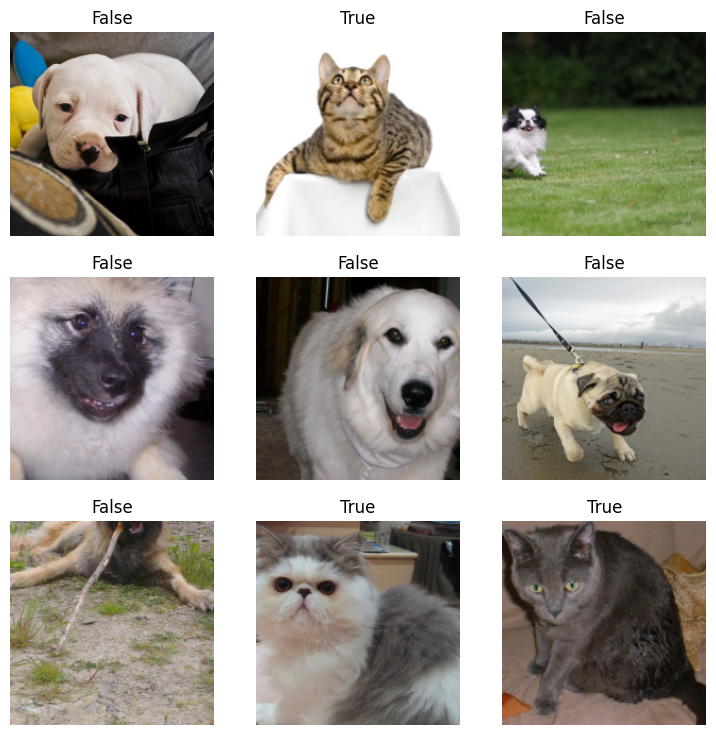

In [5]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 137MB/s]


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn.save('model_weights')

#Inference

In [ ]:
#|export
from fastai.vision.all import *
import gradio as gr

In [36]:
#|export
def is_cat(x): return x[0].isupper()

In [37]:
#|export
learn = load_learner('model.pkl')

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [42]:
#|export
categories = ['Dog','Cat']
def classify_image(img):
  img = img.resize((192, 192))
  pred , idx , prob = learn.predict(img)
  print(pred,idx,prob,"suraj",categories)
  return dict(zip(categories,map(float,prob)))

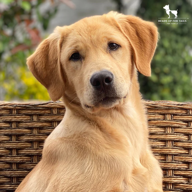

In [43]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [44]:
classify_image(im)

False tensor(0) tensor([1.0000e+00, 3.3725e-07]) suraj ['Dog', 'Cat']


{'Dog': 0.9999996423721313, 'Cat': 3.3724808190527256e-07}

In [45]:
dls.vocab

[False, True]

In [46]:
#|export
image = gr.Image(type="pil")
label = gr.Label()
interface = gr.Interface(fn=classify_image,inputs=image,outputs=label)
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8299ae9526715bc772.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [11]:
!pip install nbdev

In [ ]:
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

# Recreate the DataLoaders (structure must match training)
path = untar_data(URLs.PETS)/'images'
dls = ImageDataLoaders.from_name_func(path,
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(192))

# Create learner and load only weights (no pickling!)
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.load('model_weights')  # Load just the weights

categories = ['Dog', 'Cat']

def classify_image(img):
    img = img.resize((192, 192))
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

gr.Interface(fn=classify_image, inputs=gr.Image(type='pil'), outputs=gr.Label()).launch()

In [17]:
!ls

sample_data
